In [2406]:
# importing the required libraries.

In [2408]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statistics as st
from scipy.stats import kurtosis, skew
import math

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

from sklearn.metrics import ( accuracy_score, r2_score, mean_squared_error, root_mean_squared_error, mean_absolute_error, precision_score, recall_score,
                            f1_score, roc_auc_score, confusion_matrix, calinski_harabasz_score, davies_bouldin_score )


from sklearn.metrics import RocCurveDisplay

import warnings
warnings.filterwarnings("ignore")

In [2410]:
df = pd.read_csv("Football_data_merged_cleaned.csv")

In [2412]:
df.head()

,appearance_id,game_id,player_id,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played,...,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,game_lineups_id,type_y,number,team_captain,position_y
0,2231426_49723,2231426,49723,Timothy Chandler,L1,0,0,0,0,70,...,right,186.0,700000.0,5000000.0,2025-06-30,8d717b1017e72d89d2ee1112bb2d7466,substitutes,22,0,Right-Back
1,2231426_49723,2231426,49723,Timothy Chandler,L1,0,0,0,0,70,...,right,186.0,700000.0,5000000.0,2025-06-30,d53eb3fd74523d6dd4536653c145ae96,substitutes,22,0,Right-Back
2,2231426_49723,2231426,49723,Timothy Chandler,L1,0,0,0,0,70,...,right,186.0,700000.0,5000000.0,2025-06-30,3efc21c645e46b2f411bcdb1710aa444,substitutes,22,0,Right-Back
3,2231426_49723,2231426,49723,Timothy Chandler,L1,0,0,0,0,70,...,right,186.0,700000.0,5000000.0,2025-06-30,cc79e78c570ce19872dfed125d324407,substitutes,22,0,Right-Back
4,2231426_49723,2231426,49723,Timothy Chandler,L1,0,0,0,0,70,...,right,186.0,700000.0,5000000.0,2025-06-30,21de58902f547e231bf2604be9fa996f,substitutes,22,0,Right-Back


In [1850]:
df.columns

Index(['appearance_id', 'game_id', 'player_id', 'player_name',
       'competition_id', 'yellow_cards', 'red_cards', 'goals', 'assists',
       'minutes_played', 'season', 'round', 'home_club_goals',
       'away_club_goals', 'home_club_position', 'away_club_position',
       'home_club_manager_name', 'away_club_manager_name', 'stadium',
       'attendance', 'referee', 'home_club_name', 'away_club_name',
       'aggregate', 'competition_type', 'game_event_id', 'date', 'minute',
       'type_x', 'player_in_id', 'name', 'last_season', 'current_club_id',
       'player_code', 'country_of_birth', 'date_of_birth', 'sub_position',
       'position_x', 'foot', 'height_in_cm', 'market_value_in_eur',
       'highest_market_value_in_eur', 'contract_expiration_date',
       'game_lineups_id', 'type_y', 'number', 'team_captain', 'position_y'],
      dtype='object')

In [2414]:
# changing the game_id and player_id as object.

In [1852]:
df["game_id"] = df["game_id"].astype("object")

In [1854]:
df["player_id"] = df["player_id"].astype("object")

In [2416]:
# taking copy of the dataframe.

In [1856]:
football = df.copy()

In [1858]:
outlier = football.select_dtypes(include = ["int", "float"])

In [1860]:
outlier.columns

Index(['yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played',
       'season', 'home_club_goals', 'away_club_goals', 'home_club_position',
       'away_club_position', 'attendance', 'minute', 'player_in_id',
       'last_season', 'current_club_id', 'height_in_cm', 'market_value_in_eur',
       'highest_market_value_in_eur', 'number', 'team_captain'],
      dtype='object')

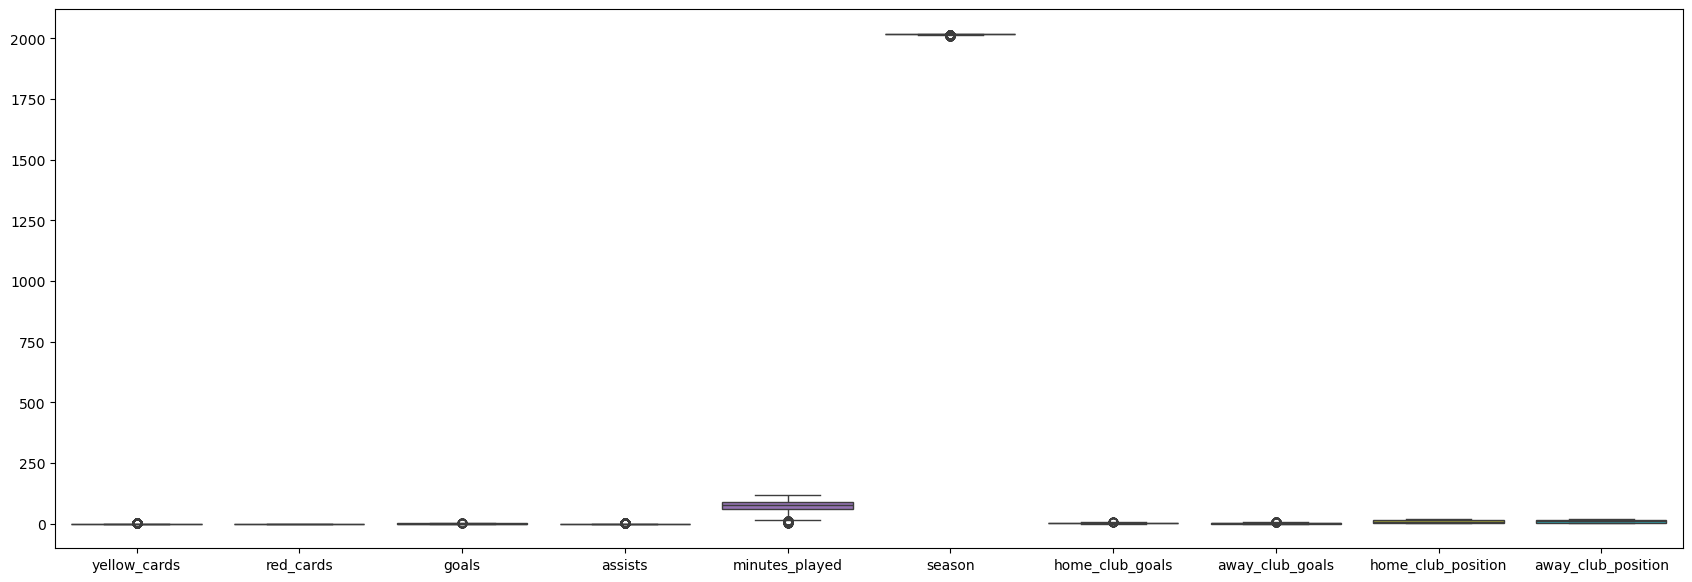

In [1862]:
plt.figure(figsize = (21,7))
sns.boxplot(outlier.iloc[:, 0:10])
plt.show()

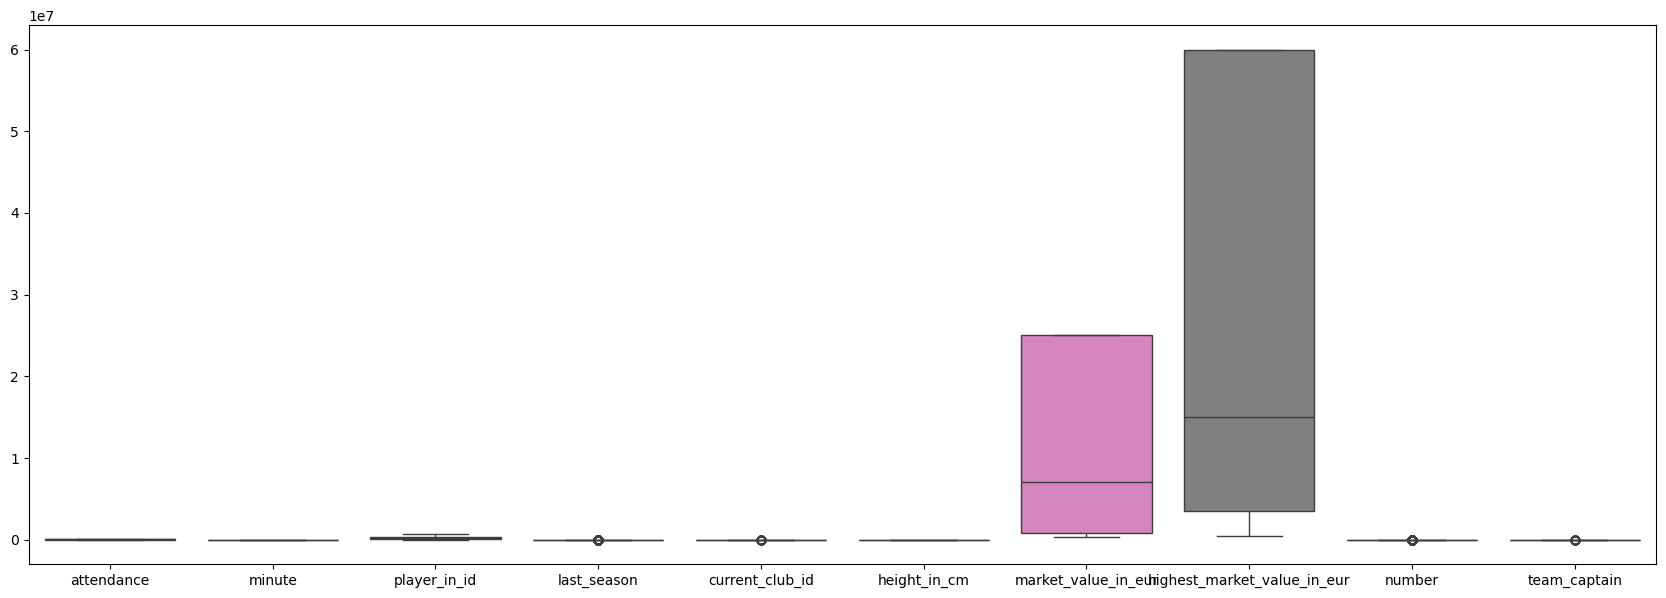

In [1864]:
plt.figure(figsize = (21,7))
sns.boxplot(outlier.iloc[:, 10:20])
plt.show()

In [1882]:
# So we convert object it into category and then we encode using LabelEncoder
# It changes the category data type into numerical datatype
# Since many machine learning model uses only numeric data types

In [2418]:
# Label encoding the required column.

In [1884]:
football["position_x_encode"] = football["position_x"].astype("category")

In [1886]:
football["position_y_encode"] = football["position_y"].astype("category")

In [1888]:
football["position_x_encode"] = Labelencoder.fit_transform(football["position_x_encode"])

In [1890]:
football["position_y_encode"] = Labelencoder.fit_transform(football["position_y_encode"])

In [1924]:
football["foot_enc"] = football["foot"].astype("category").cat.codes

In [1926]:
date_col = ["date", "date_of_birth", "contract_expiration_date"]
for col in date_col:
    football[col] = pd.to_datetime(football[col], errors='coerce')

In [1928]:
football["day_of_week"] = football["date"].dt.day_name()
football["is_weekend"] = football["day_of_week"].isin(["Saturday", "Sunday"]).astype(int)

In [1930]:
feature_columns = ["home_club_name", "away_club_name", "competition_type", "day_of_week", "type_x", "type_y", "round", "stadium"]

In [1932]:
Labelencoder = LabelEncoder()

In [1934]:
for col in feature_columns:
    football[col + "_enc"] = Labelencoder.fit_transform(football[col])

In [1938]:
football["age_of_player"] = (football["date"] - football["date_of_birth"]).dt.days // 365

In [1940]:
football["country_of_birth_enc"] = football["country_of_birth"].astype("category")

In [1942]:
football["country_of_birth_enc"]  = Labelencoder.fit_transform(football["country_of_birth_enc"])

# PERFORMANCE ANALYSIS

# LOGISTIC REGRESSION

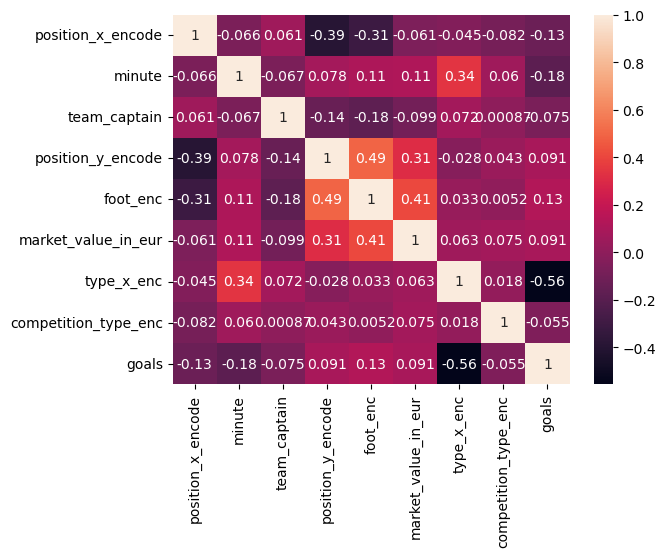

In [2426]:
sns.heatmap(football[["position_x_encode", "minute", "team_captain", "position_y_encode", "foot_enc", "market_value_in_eur", "type_x_enc", "competition_type_enc","goals"]].corr(), annot = True)
plt.show()

In [2428]:
X = football[["position_x_encode", "minute", "team_captain", "position_y_encode", "foot_enc", "market_value_in_eur", "type_x_enc", "competition_type_enc"]]
y = np.where(football["goals"] > 0, 1, 0)

In [2430]:
# balanced data

In [2432]:
football["goals"].value_counts()

goals
0    2594
1    1461
2     102
3      42
Name: count, dtype: int64

In [2434]:
# spliting the data.

In [2436]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [2438]:
# scaling the X data.

In [2440]:
# scaling is important because if we have columns with high difference in their ranges then the column which has the highest 
# value is dominated (given preference over the low range column) so it make our model bias.
# To reduce this we perform scaling, it transform all the column ranges into uniform range
# The mean value is 0 and stdev becomes 1 for all column.

In [2442]:
Labelencoder = LabelEncoder()

In [2444]:
scaling = StandardScaler()

In [2446]:
X_train = scaling.fit_transform(X_train)
X_test = scaling.transform(X_test)

In [2448]:
# Creating the logistic regression model.

In [2450]:
Logistic_regression_model = LogisticRegression() 

In [2452]:
Logistic_regression_model.fit(X_train, y_train)

LogisticRegression()

In [2454]:
# predicting the value.

In [2456]:
y_pred = Logistic_regression_model.predict(X_test)

In [2458]:
# Evaluating the model.

In [2460]:
accuracy = accuracy_score(y_test, y_pred)

In [2462]:
print("The accuracy score is", round(accuracy,2))

The accuracy score is 0.86


In [2464]:
precision = precision_score(y_test, y_pred)
recall = precision_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)

In [2466]:
print("The precision score is ",round(precision,2))

The precision score is  0.87


In [2468]:
print("The recall score is ",round(recall,2))

The recall score is  0.87


In [2470]:
print("The f1 score is ",round(f1score,3))

The f1 score is  0.803


In [2520]:
conmat = confusion_matrix(y_test, y_pred)

In [2522]:
print("The confusion matrix is ", conmat)

The confusion matrix is  [[716  54]
 [125 365]]


In [2534]:
TN, FP, FN, TP = conmat.ravel()

In [2524]:
y_prob = Logistic_regression_model.predict_proba(X_test)

In [2526]:
y_test.shape

(1260,)

In [2528]:
y_prob.shape

(1260, 2)

In [2530]:
roc_auc = roc_auc_score(y_test, y_prob[:,1])

In [2532]:
print("The roc auc score is ",round(roc_auc,2))

The roc auc score is  0.87


In [1437]:
# plot the roc curve

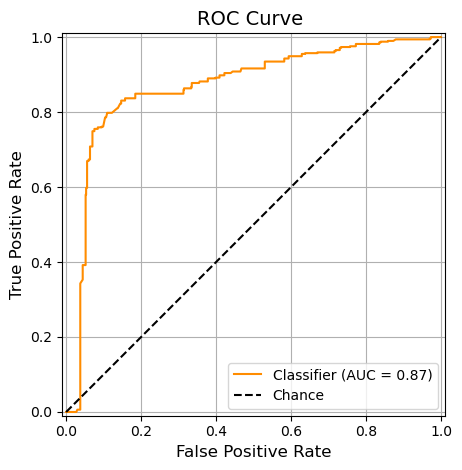

In [1453]:
roc_display = RocCurveDisplay.from_predictions(y_test, y_prob[:,[1]] ,color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label='Chance')

plt.title('ROC Curve ', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# SAMPLING -- CLT - CENTRAL LIMIT THEOREM

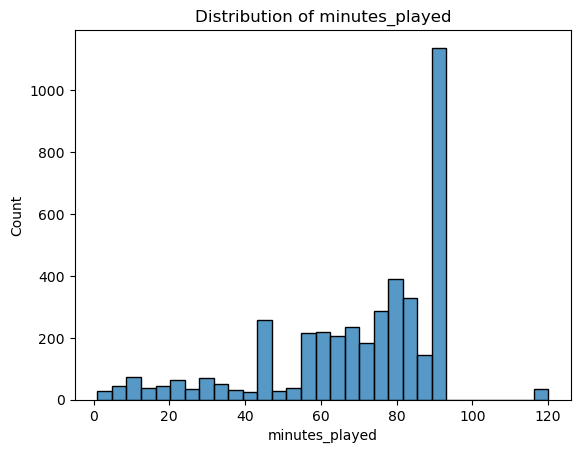

In [2337]:
sns.histplot(football["minutes_played"])
plt.title("Distribution of minutes_played")
plt.show()

In [2341]:
population_mean = st.mean(football["minutes_played"])
population_median = st.median(football["minutes_played"])
population_mode = st.mode(football["minutes_played"])
population_stdev = st.stdev(football["minutes_played"])
population_kutosis = kurtosis(football["minutes_played"])
population_skewness = skew(football["minutes_played"])

In [2343]:
print(f"The population mean is  {population_mean}")
print(f"The population median is  {population_median}")
print(f"The population mode is  {population_mode}")
print(f"The population stdev is {population_stdev}")
print(f"The population kutosis is {population_kutosis}")
print(f"The population skewness is {population_skewness}")

The population mean is  69.73493688973565
The population median is  77
The population mode is  90
The population stdev is 22.695993988055037
The population kutosis is 0.6863205299333908
The population skewness is -1.0942536314426756


In [2345]:
# Sample data

In [2347]:
sample_size = [10,20,30,40,100,150,200,250]

In [2349]:
for i in sample_size: 
    sample_data = football.sample(n = i, random_state = 1,replace = True)
    if i == 10:
        sample_size_10 = sample_data
    elif i == 20:
        sample_size_20 = sample_data
    elif i == 30:
        sample_size_30 = sample_data
    elif i == 40:
        sample_size_40 = sample_data
    elif i == 100:
        sample_size_100 = sample_data
    elif i == 150:
        sample_size_150 = sample_data
    elif i == 200:
        sample_size_200 = sample_data
    elif i == 250:
        sample_size_250 = sample_data


In [2351]:
sample_size_data = {10:sample_size_10,20:sample_size_20,30:sample_size_30,40:sample_size_40,100:sample_size_100,150:sample_size_150,200:sample_size_200,250:sample_size_250}

In [2353]:
for j,i in sample_size_data.items(): 
    
     print("----"*10,"sample size ",j,"----"*10)
     print(f"The mean is  {st.mean(i["minutes_played"])}")
     print(f"The median is {st.median(i["minutes_played"])}")
     print(f"The mode is {st.mode(i["minutes_played"])}")
     print(f"The stdev is {st.stdev(i["minutes_played"])}")
     print(f"The kutosis is {kurtosis(i["minutes_played"])}")
     print(f"The skewness is {skew(i["minutes_played"])}")


---------------------------------------- sample size  10 ----------------------------------------
The mean is  78.4
The median is 80.5
The mode is 90
The stdev is 12.09407568467581
The kutosis is -1.4913638394483228
The skewness is -0.34788420294491873
---------------------------------------- sample size  20 ----------------------------------------
The mean is  73.95
The median is 76.5
The mode is 90
The stdev is 17.910523222543308
The kutosis is 3.786424268231144
The skewness is -1.7465353023096197
---------------------------------------- sample size  30 ----------------------------------------
The mean is  73.93333333333334
The median is 75.0
The mode is 90
The stdev is 20.290873323489187
The kutosis is 1.7072152754028371
The skewness is -0.803238513370592
---------------------------------------- sample size  40 ----------------------------------------
The mean is  75.7
The median is 77.0
The mode is 90
The stdev is 18.292775651213816
The kutosis is 2.6624896183108673
The skewness is

In [2355]:
# sample size 200 mean is similar to population mean
# 69.7(population) is similar to 68.48(sample)

In [2606]:
sample_mean = st.mean(sample_size_200["minutes_played"])
median_sample = st.median(sample_size_200["minutes_played"])
mode_sample = st.mode(sample_size_200["minutes_played"])
sample_stdev = st.stdev(sample_size_200["minutes_played"])
skewess_sample = skew(sample_size_200["minutes_played"])
kurtosis_sample = kurtosis(sample_size_200["minutes_played"])

print("----"*10, "Details of sample data of 200", "----"*10)
print("The mean of sample is", sample_mean)
print("The median of sample is", median_sample)
print("The mode of sample is", mode_sample)
print("The standard deviation of sample is", sample_stdev)
print("The skewness of sample is", skewess_sample)
print("The kurtosis of sample is", kurtosis_sample)

---------------------------------------- Details of sample data of 200 ----------------------------------------
The mean of sample is 68.485
The median of sample is 76.5
The mode of sample is 90
The standard deviation of sample is 23.44371587590909
The skewness of sample is -0.9555607550806371
The kurtosis of sample is 0.2618802769715556


In [2357]:
sample = pd.DataFrame()

In [2570]:
for i in range(20):
    data = football["minutes_played"].sample(n = 200, replace = True, ignore_index = True, random_state = i)
    sample["sample_data" + str(i)] = data

In [2572]:
sample

,sample_data0,sample_data1,sample_data2,sample_data3,sample_data4,sample_data5,sample_data6,sample_data7,sample_data8,sample_data9,sample_data10,sample_data11,sample_data12,sample_data13,sample_data14,sample_data15,sample_data16,sample_data17,sample_data18,sample_data19
0,78,90,31,40,64,70,90,69,84,1,80,84,90,55,90,90,75,90,90,90
1,69,66,90,90,90,81,90,73,90,84,73,82,28,90,80,11,76,90,64,61
2,61,77,63,56,90,71,21,16,45,45,58,78,78,45,68,71,73,13,84,70
3,81,90,86,90,45,90,55,77,79,64,74,80,80,45,90,72,90,73,90,90
4,90,84,90,90,90,90,90,84,79,90,54,90,90,38,45,72,1,90,56,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,73,75,82,81,90,66,21,90,90,82,73,11,71,9,33,90,78,90,84,22
196,90,80,54,90,84,8,90,70,61,40,61,67,86,90,90,71,90,64,90,45
197,80,90,55,90,90,62,55,30,85,78,80,68,84,90,90,90,90,79,9,76
198,65,86,13,45,67,79,81,81,77,79,76,58,64,81,90,78,90,81,90,90


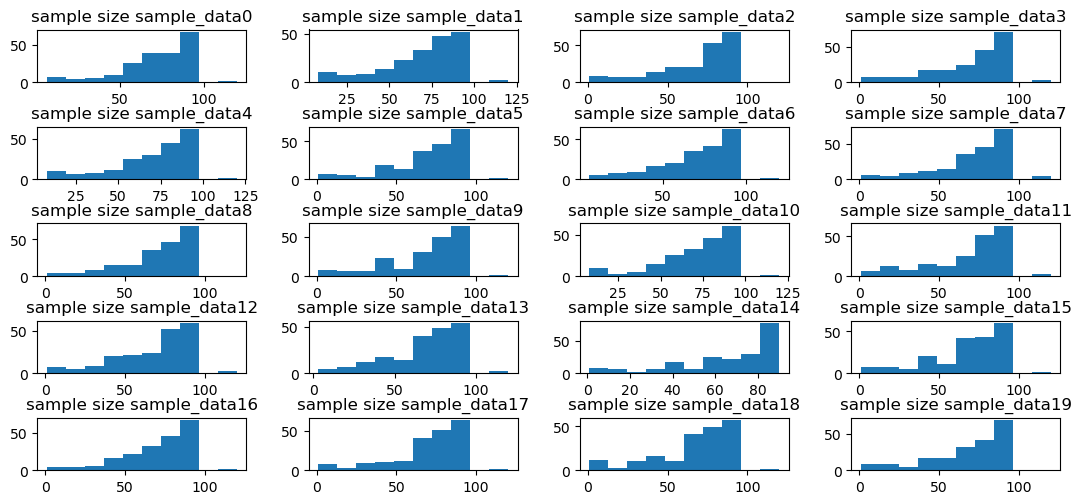

In [2574]:
fig, ax = plt.subplots(5,4, figsize = (11,5))
sample_size = sample.columns
plt.tight_layout()
k = 0
for x in range(0,5):
    for y in range (0,4):
        ax[x,y].hist(sample[sample_size[k]])
        ax[x,y].set_title("sample size "+sample_size[k])
        k = k + 1

In [2576]:
mean = []
for col in sample_size:
    mean.append(sample[col].mean())

In [2578]:
sample_data = pd.DataFrame({"sample":sample.columns, "mean":mean})

In [2580]:
sample_data

,sample,mean
0,sample_data0,72.275
1,sample_data1,68.485
2,sample_data2,69.740
3,sample_data3,70.170
4,sample_data4,70.730
5,sample_data5,70.500
6,sample_data6,69.970
7,sample_data7,72.110
8,sample_data8,70.825
9,sample_data9,68.695


In [2582]:
# stdev of the samples mean

In [2584]:
stdev_sample = st.stdev(sample_data["mean"])

In [2594]:
print("The sample stdev is ", round(stdev_sample,2))

The sample stdev is  1.38


In [2588]:
# calculated standard deviation

In [2590]:
cal_stdev = population_stdev / math.sqrt(200)

In [2596]:
print("The caluculated population stdev is ", round(cal_stdev,2))

The caluculated population stdev is  1.6


In [2600]:
# We can able to see that the stdev of sample mean is similar to the calculated stdev by population stdev divided by sqrt of n.

In [2598]:
from scipy import stats

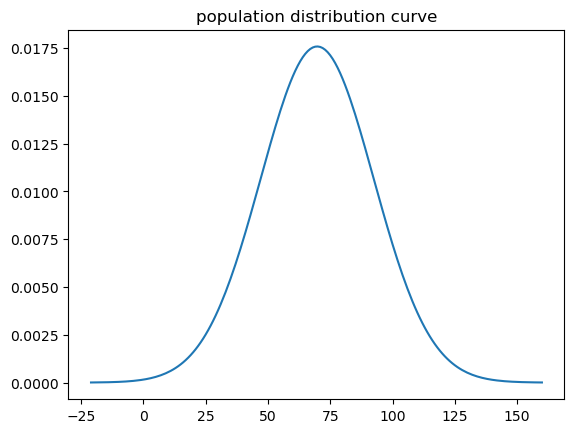

In [2604]:
lower = population_mean - 4 * population_stdev
upper = population_mean + 4 * population_stdev
x = np.arange(lower, upper)
y = stats.norm.pdf(x, population_mean, population_stdev)
plt.plot(x,y)
plt.title("population distribution curve")
plt.show()

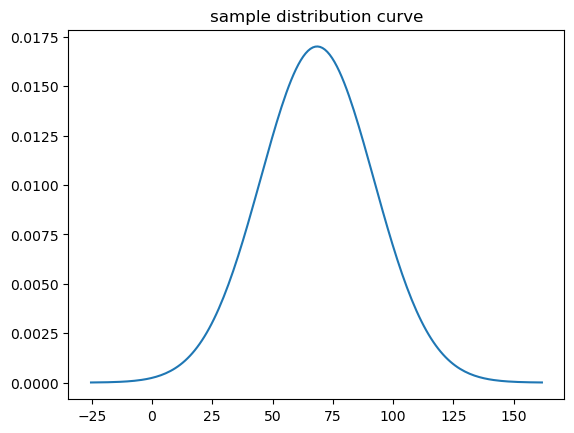

In [2612]:
lower = sample_mean - 4 * sample_stdev
upper = sample_mean + 4 * sample_stdev
x = np.arange(lower, upper)
y = stats.norm.pdf(x, sample_mean , sample_stdev)
plt.plot(x,y)
plt.title("sample distribution curve")
plt.show()

# PROBABILITY

In [2619]:
team_scored = football.loc[(football["home_club_goals"]) | (football["away_club_goals"])]

In [2629]:
team_and_player_scored = team_scored.loc[team_scored["goals"] > 0]

In [2633]:
player_scored = len(team_and_player_scored) / len(team_scored)

In [2640]:
print("The probability of player scores a goal given that participated in the team scored greater than 2 goals", round(player_scored,3))

The probability of player scores a goal given that participated in the team scored greater than 2 goals 0.101


# Player Profile and Market Value

In [4212]:
player_profile = football.groupby(["player_name"])["yellow_cards"].sum()

In [4214]:
player_profile = player_profile.sort_values(ascending = False)

In [4216]:
player_profile

player_name
John Anthony Brooks    143
Emmanuel Sabbi         121
Weston McKennie        120
Timothy Chandler        90
Christian Pulisic       70
Christian Cappis        40
Giovanni Reyna          24
Kenny Saief             20
Timothy Weah            20
Jonathan Amon           17
Josh Sargent             3
Terrence Boyd            2
Lynden Gooch             1
Desevio Payne            1
Joseph Efford            0
Caleb Stanko             0
Julian Green             0
Jordan                   0
Luca de la Torre         0
Sergino Dest             0
Tim Ream                 0
Erik Palmer-Brown        0
Tyler Adams              0
Andrija Novakovich       0
Name: yellow_cards, dtype: int64

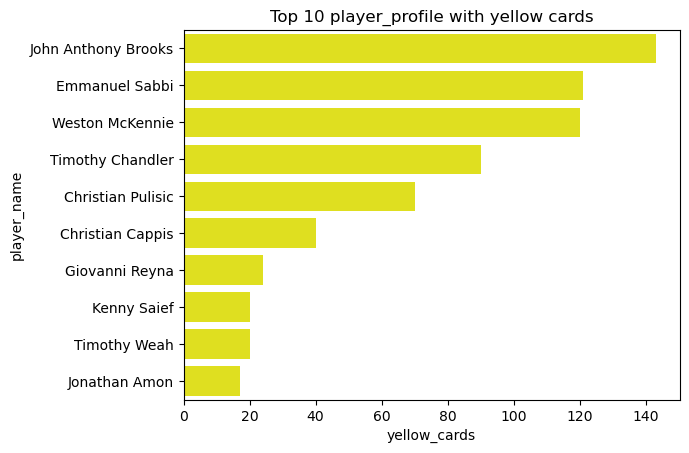

In [2649]:
sns.barplot(x = player_profile[:10], y = player_profile.index[:10], color = 'yellow')
plt.title("Top 10 player_profile with yellow cards")
plt.show()

In [2651]:
# John Anthony Brooks has got the highest number of yellow cards followed by Emmanuel Sabbi and Weston Mckennie.

In [ ]:
Can we predict a player’s height using physical traits (foot) and recent performance (goals, assists)?

In [4040]:
selected_column = football[["goals", "assists", "height_in_cm", "foot_enc", "yellow_cards", "red_cards", "position_x_encode", "country_of_birth_enc", "minutes_played","market_value_in_eur", "type_x_enc", "type_y_enc", "age_of_player", "current_club_id", "competition_type_enc", "team_captain", "round_enc", "position_y_encode"]]

In [4042]:
scaled_df = scaling.fit_transform(selected_column)
scaled_df = pd.DataFrame(scaled_df, columns = selected_column.columns)

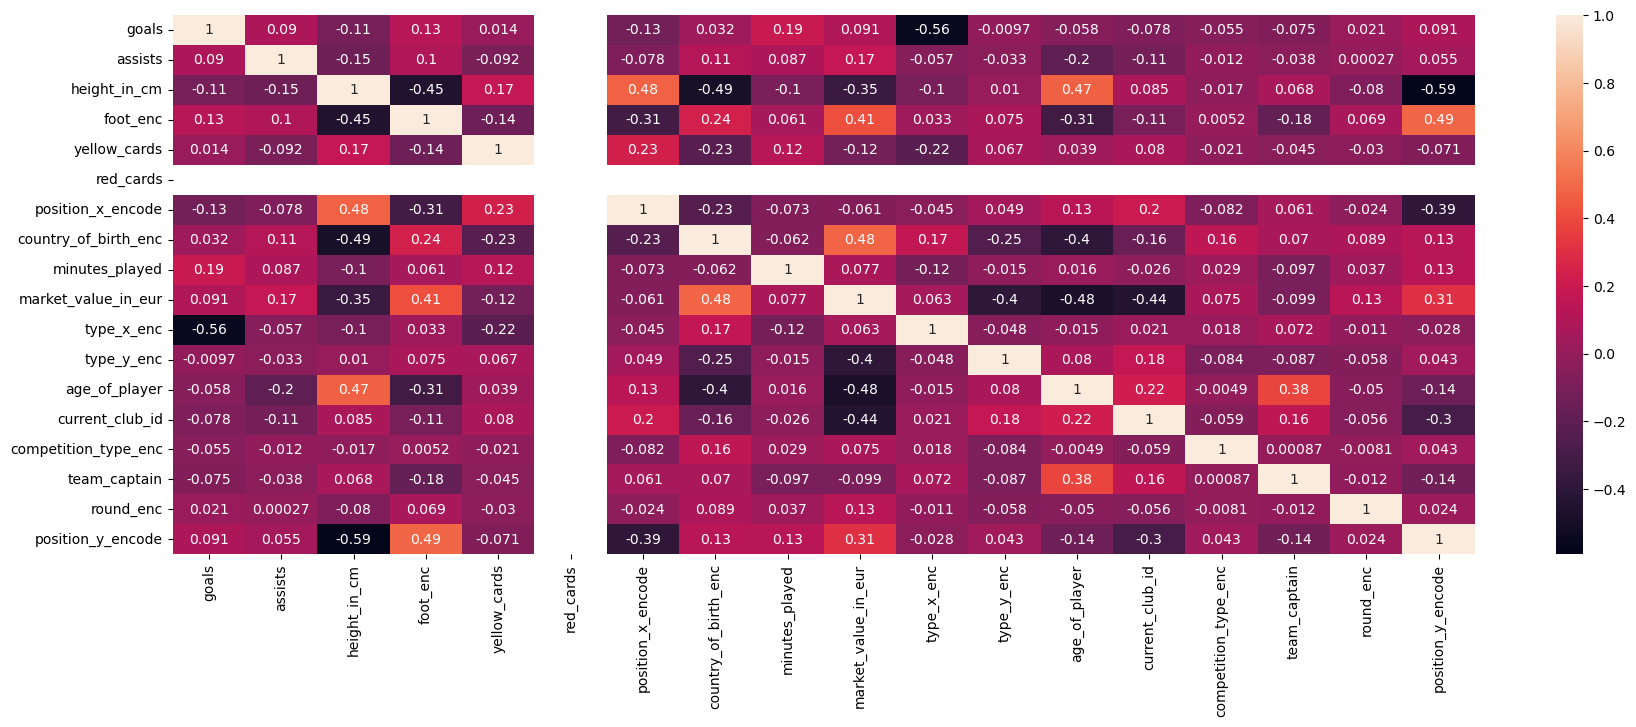

In [4044]:
plt.figure(figsize = (21, 7))
sns.heatmap(scaled_df.corr(), annot = True)
plt.show()

In [2659]:
# simple linear Regression

In [4242]:
X = scaled_df[["position_y_encode"]]
y = scaled_df["height_in_cm"]

In [4246]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)

In [4248]:
linear_model = LinearRegression()

In [4250]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [4252]:
y_pred = linear_model.predict(X_test)

In [4254]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

In [4256]:
print("The mse score is ", mse)
print("The mae score is ", mae)
print("The rmse score is ", rmse)

The mse score is  0.6066666813161979
The mae score is  0.6398162129568318
The rmse score is  0.7788881057739924


In [4258]:
r2score = r2_score(y_test, y_pred)

In [4260]:
print("The r2 score is ", r2score)

The r2 score is  0.3909098652879318


In [4239]:
# r2 score is very low for simple linear regression.

In [2679]:
# Multi linear Regression

In [4125]:
X = scaled_df.loc[:,["position_y_encode", "age_of_player", "foot_enc"]]
y = scaled_df["height_in_cm"]

In [4127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 20)

In [4129]:
linear_model = LinearRegression()

In [4131]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [4133]:
y_pred = linear_model.predict(X_test)

In [4135]:
intercept = linear_model.intercept_
slope = linear_model.coef_

In [4137]:
print("The intercept is ", intercept)
print("The slope  is ", slope)

The intercept is  -0.009622502396658857
The slope  is  [-0.48832563  0.35612343 -0.09920001]


In [4139]:
print("The mse score is ", mse)
print("The mae score is ", mae)
print("The rmse score is ", rmse)

The mse score is  0.36538679244171696
The mae score is  0.4574374777285286
The rmse score is  0.6044723256210469


In [4143]:
r2score = r2_score(y_test, y_pred)

In [4145]:
print("The r2 score is ", r2score)

The r2 score is  0.5262237439444606


In [4218]:
# The r2 score is increasing when compared to simple linear regression.

In [4147]:
X = scaled_df.loc[:,["age_of_player", "type_y_enc", "current_club_id", "market_value_in_eur", "position_y_encode", "country_of_birth_enc", "foot_enc", "assists", "yellow_cards"]]
y = scaled_df["height_in_cm"]

In [4169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 20)

In [4171]:
linear_model = LinearRegression()

In [4173]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [4175]:
y_pred = linear_model.predict(X_test)

In [4177]:
intercept = linear_model.intercept_
slope = linear_model.coef_

In [4179]:
print("The intercept is ", intercept)
print("The slope  is ", slope)

The intercept is  -0.012107827899459763
The slope  is  [ 0.31479607  0.00620098 -0.17999238  0.08561195 -0.53881611 -0.32721964
 -0.05690645 -0.04225755  0.0540402 ]


In [4181]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

In [4183]:
print("The mse score is ", mse)
print("The mae score is ", mae)
print("The rmse score is ", rmse)

The mse score is  0.33762854047713464
The mae score is  0.43988688278710153
The rmse score is  0.5810581214277404


In [4185]:
r2score = r2_score(y_test, y_pred)

In [4187]:
print("The r2 score is ", r2score)

The r2 score is  0.6618079765076301


In [4189]:
def calculate_residuals(model, features, label):
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

def linear_assumption(model, features, label):
    print('Assumption 1: Linear Relationship between the Target and the Feature', '\n')
        
    print('Checking with a scatter plot of actual vs. predicted.',
           'Predictions should follow the diagonal line.')
    
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)
    
    # Plotting the actual vs predicted values
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False)
        
    # Plotting the diagonal line
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()

Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


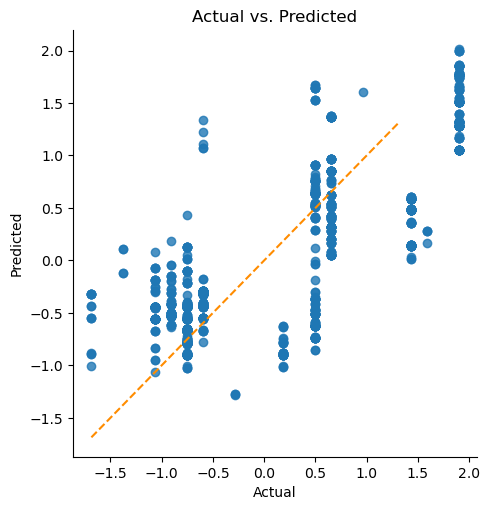

In [4191]:
linear_assumption(linear_model, X_test, y_test)

In [4193]:
def homoscedasticity_assumption(model, features, label):
    
    print("Assumption : Homosccadasticity of error terms \n")
    print("Residuals should have relative constant variance")

    # calculate rediuals for the plot

    df_results = calculate_residuals(model, features, label)

    # plotting the residuals

    plt.subplots(figsize = (12,6))
    ax = plt.subplot(111)
    plt.scatter(x = df_results.index, y = df_results['Residuals'])
    plt.plot(np.repeat(0,df_results.index.max()), color = 'darkorange', linestyle = '--')
    plt.title('Residual plot')
    plt.xlabel('Index')
    plt.ylabel('Residual')
    plt.show()

Assumption : Homosccadasticity of error terms 

Residuals should have relative constant variance


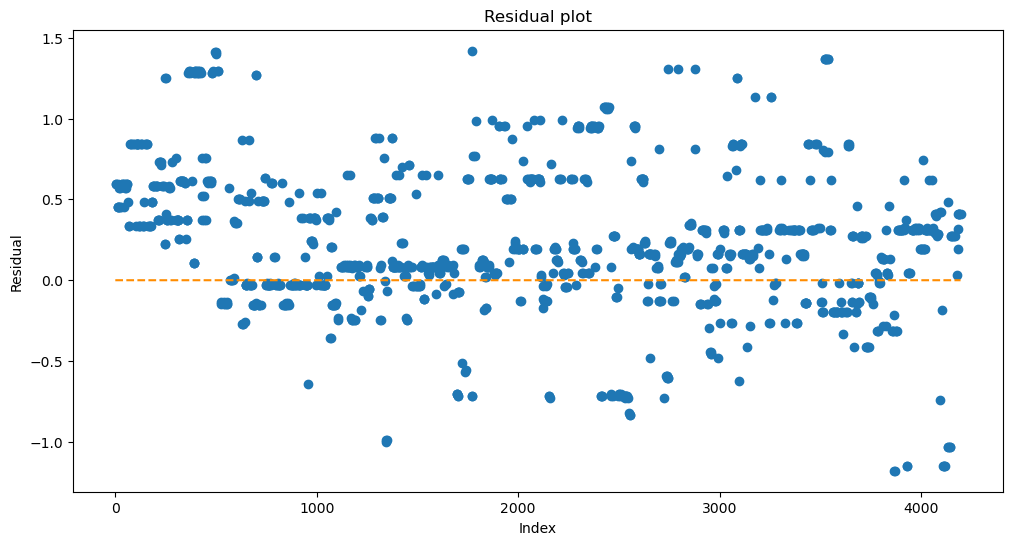

In [4195]:
homoscedasticity_assumption(linear_model, X_test, y_test)

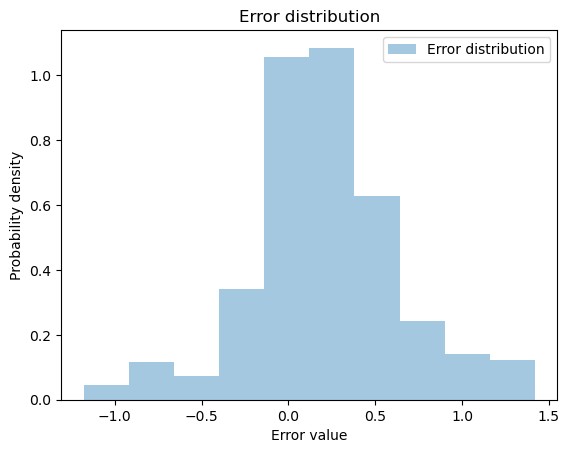

In [4197]:
# Code to Error Normality curve
df_results = calculate_residuals(linear_model, X_test, y_test)
plt.hist(df_results["Residuals"], density = True, label = 'Error distribution', alpha = 0.4)
plt.legend()
plt.xlabel("Error value")
plt.ylabel("Probability density")
plt.title("Error distribution")
plt.show()

# TEAM COMPARISON ANALYSIS

# HYPOTHESIS TESTING

In [3952]:
from scipy.stats import f_oneway

In [3950]:
alpha = 0.05

In [3954]:
FC_Nuremberg = football.loc[football["home_club_name"] == "1.FC Nuremberg", "height_in_cm"]

In [3956]:
FC_Schalke = football.loc[football["home_club_name"] == "FC Schalke 04", "height_in_cm"]

In [3958]:
Borussia_Dortmund = football.loc[football["home_club_name"] == "Borussia Dortmund", "height_in_cm"]

In [3960]:
Hobro_IK	 = football.loc[football["home_club_name"] == "Hobro IK", "height_in_cm"]

In [3962]:
f_statistics, p_value = f_oneway(FC_Nuremberg, FC_Schalke, Borussia_Dortmund, Hobro_IK)

In [3964]:
if p_value < alpha:
    print(p_value,"<" ,alpha, " So We reject null hypothesis")
else:
    print("We accept the null hypothesis. We cannot reject null hypotheis since p value is ", round(p_value,2), ">", alpha, "alpha value")

7.450560689010882e-126 < 0.05  So We reject null hypothesis


In [3966]:
# This is scientific notation.
# It is extremely close to 0 in practical cases.
# The difference between the groups is so large that the p-value is extremely small

# Attendance and Stadium Analysis

In [3237]:
week_attendance = football.groupby(["is_weekend"])["attendance"].mean()

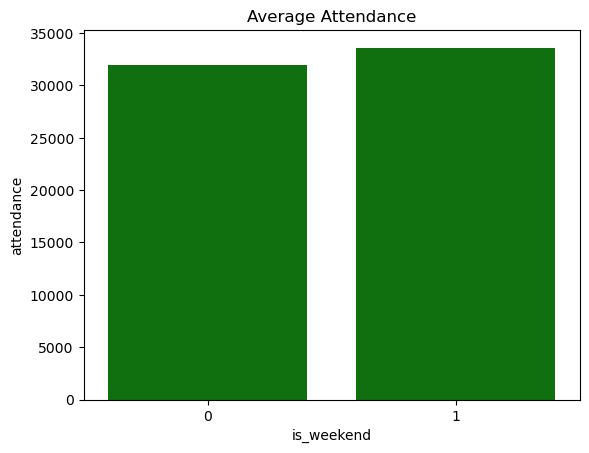

In [3239]:
sns.barplot(x = week_attendance.index, y = week_attendance, color = 'g')
plt.title("Average Attendance")
plt.show()

In [3241]:
# Weekend, we can able to see the average attendance higher than the weekdays
# But not much higher since weekday also we have better average attendance

In [3243]:
stadium_Status = football.groupby(["stadium"])["goals"].sum()

In [3245]:
stadium_Status = stadium_Status.sort_values(ascending = False)

In [3247]:
stadium_Status[:10]

stadium
SIGNAL IDUNA PARK        220
DS Arena                 147
Turf Moor                126
Volkswagen Arena          92
Right to Dream Park       85
Roazhon Park              72
Commerzbank Arena         67
BUKO Stadion              60
Stamford Bridge           56
Olympiastadion Berlin     54
Name: goals, dtype: int64

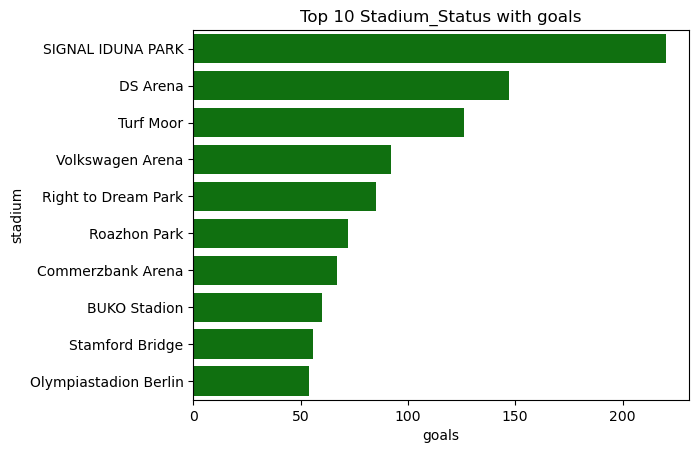

In [3249]:
sns.barplot(x = stadium_Status[:10], y = stadium_Status.index[:10], color = 'g')
plt.title("Top 10 Stadium_Status with goals")
plt.show()

In [3251]:
# In SIGNAL IDUNA PARK stadium highest number of goals has been recorded, it is 220 goals
# followed by DS Arena and Turf Moor.

# KNN MODEL

In [3737]:
# created the required column

In [3739]:
def avg_goals(code):
    if code == 0:
        return "low"
    elif code > 0 and code <= 1:
        return "medium"
    else:
        return "high"

In [3741]:
football["avg_goals"] = football["goals"].apply(avg_goals)
football["avg_goals"] = pd.Categorical(football["avg_goals"], categories = ["low", "medium", "high"], ordered = True)
football["avg_goals_enc"] = football["avg_goals"].cat.codes

In [3743]:
football["avg_goals_enc"].value_counts()

avg_goals_enc
0    2594
1    1461
2     144
Name: count, dtype: int64

In [3745]:
# selecting the feature column and scaling the feature column.

In [3692]:
feature = football[["stadium_enc", "competition_type_enc"]]
scaling = StandardScaler()
scaled_df = scaling.fit_transform(feature)
scaled_df = pd.DataFrame(scaled_df, columns = feature.columns)

In [3696]:
X = scaled_df
y = football["avg_goals_enc"]

In [3747]:
# spliting the data

In [3706]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 6)

In [3749]:
# finding the optimsed k value

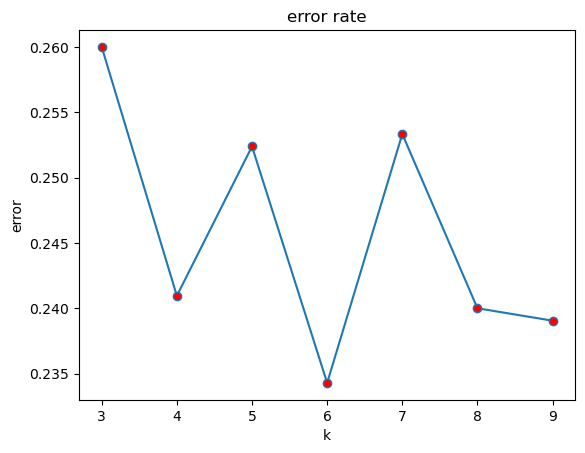

In [3708]:
error_rate =[]
for i in range(3,10):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_y = knn.predict(X_test)
    error_rate.append(np.mean(pred_y != y_test))

plt.plot(range(3,10), error_rate, marker = "o", markerfacecolor = "red")
plt.title("error rate")
plt.xlabel("k")
plt.ylabel("error")
plt.show()

In [3710]:
knn = KNeighborsClassifier(n_neighbors = 6)

In [3712]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [3753]:
# Total class of the model.

In [3714]:
knn.classes_

array([0, 1, 2], dtype=int8)

In [3716]:
y_pred = knn.predict(X_test)

In [3751]:
# Evaluating the model.

In [3718]:
accuracy = accuracy_score(y_test, y_pred)

In [3728]:
print("The accuracy of knn is ",accuracy)

The accuracy of knn is  0.7657142857142857


In [3730]:
precision = precision_score(y_test, y_pred, average = "micro")
recall = recall_score(y_test, y_pred, average = "micro")
f1score = f1_score(y_test, y_pred, average = "micro")

In [3732]:
print("The precision of knn is ",precision)
print("The recall of knn is ",recall)
print("The f1 score is ",f1score)

The precision of knn is  0.7657142857142857
The recall of knn is  0.7657142857142857
The f1 score is  0.7657142857142857


In [3724]:
y_prob = knn.predict_proba(X_test)

In [3726]:
roc_auc = roc_auc_score(y_test, y_prob, multi_class = "ovr", average = "macro")

In [3734]:
print("The roc auc score is ",roc_score)

The roc auc score is  0.8194071013884362


The target names is  ['low', 'medium', 'high']


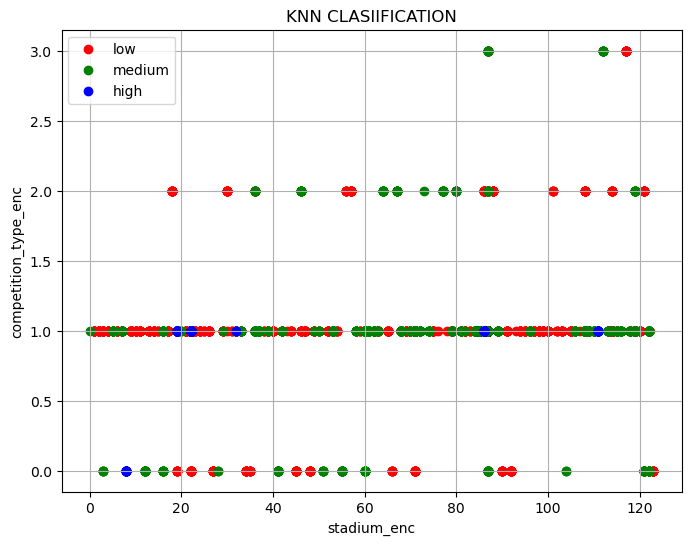

In [3941]:
X = football[["stadium_enc", "competition_type_enc"]].values
y = football["avg_goals_enc"].values
target_name = ["low", "medium", "high"]
print("The target names is ",target_name)

# choose two features to visualize 
feature_1 = "stadium_enc"   
feature_2 = "competition_type_enc"  
plt.figure(figsize = (8,6))

for target, target_name, color in zip(range(len(target_name)), target_name, ['r','g','b']):
    plt.scatter(X[y == target, 0], X[y == target, 1], label = target_name, color = color)
plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.title("KNN CLASIIFICATION")
plt.legend()
plt.grid(True)
plt.show()

In [2142]:
test = pd.read_excel("test data.xlsx")

In [2144]:
new = test.copy()

In [2146]:
new["avg_attendance"] = new["attendance"].apply(avg_attendance)

In [2148]:
new["avg_attendance"] = pd.Categorical(new["avg_attendance"], categories = ["low", "medium", "high"], ordered = True)

In [2150]:
new["avg_attendance_enc"] = new["avg_attendance"].cat.codes

In [2152]:
new["day_of_week"] = new["date"].dt.day_name()
new["is_weekend"] = new["day_of_week"].isin(["Saturday", "Sunday"]).astype(int)

In [2154]:
feature_columns = ["home_club_name", "away_club_name", "competition_type", "day_of_week", "type_x", "type_y", "round", "stadium"]

In [2156]:
Labelencoder = LabelEncoder()

In [2158]:
for col in feature_columns:
    new[col + "_enc"] = Labelencoder.fit_transform(new[col])

In [2160]:
X_new = new[['home_club_name_enc', 'away_club_name_enc', 'competition_type_enc', 'day_of_week_enc',"is_weekend", "stadium_enc"]]

In [2162]:
y_new = new["avg_attendance_enc"]

In [2164]:
new_df = scaling.transform(X_new)
new_df = pd.DataFrame(new_df, columns = X_new.columns)

In [2166]:
y_new_predict = knn.predict(X_new)

In [2168]:
y_new

0    0
1    0
Name: avg_attendance_enc, dtype: int8

In [2170]:
y_new_predict

array([0, 0], dtype=int8)

# EVENT ANALYSIS

# HYPOTHESIS TESTING

In [3972]:
# spliting the data

In [3974]:
weekday = football.loc[football["is_weekend"] == 0]
weekend = football.loc[football["is_weekend"] == 1]

In [3976]:
# Taking sample from the data

In [3978]:
n1 = 26
n2 = 26

In [3980]:
dof = n1 + n2 - 2

In [3982]:
# Threshold value
alpha = 0.05

In [3984]:
weekday_sample_data = weekday.sample(n = 26, random_state = 7)

In [3986]:
weekend_sample_data = weekend.sample(n = 26, random_state = 7)

In [3988]:
sample_mean1 = st.mean(weekday_sample_data["goals"])
sample_mean2 = st.mean(weekend_sample_data["goals"])

In [3990]:
sample_stdev1 = st.stdev(weekday_sample_data["goals"])
sample_stdev2 = st.stdev(weekend_sample_data["goals"])

In [3992]:
print("The sample mean1 is ", sample_mean1)
print("The sample mean2 is ", sample_mean2)
print("The sample stdev11 is ", sample_stdev1)
print("The sample stdev12 is ", sample_stdev2)

The sample mean1 is  0.5384615384615384
The sample mean2 is  0.5769230769230769
The sample stdev11 is  0.5817744738827396
The sample stdev12 is  0.7575263387144726


In [3994]:
from scipy.stats import norm, t

In [3996]:
t_statistics = (sample_mean1 - sample_mean2) / math.sqrt((sample_stdev1 ** 2 / n1) + (sample_stdev2 ** 2 / n2))

In [3998]:
# Finding the p value using the sf (survival function)

In [4000]:
p_value = t.sf(t_statistics, dof) * 2

In [4002]:
# Finding the t critical using percent point function.

In [4004]:
t_critical = t.ppf(1-alpha / 2, dof)

In [4006]:
print("The t_statistics is ", t_statistics) 
print("The p_value is ", p_value) 
print("The t_critical is ", t_critical) 

The t_statistics is  -0.20532539058829533
The p_value is  1.1618484397187292
The t_critical is  2.008559112100761


In [4008]:
if p_value < alpha:
    print("We reject null hypothesis")
else:
    print("We accept the null hypothesis. We cannot reject null hypotheis since p value is ", round(p_value,2), ">", alpha, "alpha value")

We accept the null hypothesis. We cannot reject null hypotheis since p value is  1.16 > 0.05 alpha value


In [4012]:
tall_player = football[football["height_in_cm"] > football["height_in_cm"].median()]

In [4014]:
small_player = football[football["height_in_cm"] <= football["height_in_cm"].median()]

In [4016]:
population_stdev1 = football["goals"].std()

In [4018]:
population_stdev2 = small_player["goals"].std()

In [4020]:
n1 = 50 
n2 = 50

In [4022]:
# 5 % significance value

In [4024]:
alpha = 0.05

In [4026]:
sample_mean2 = tall_player["goals"].sample(n = 50, random_state = 1).mean()

In [4028]:
sample_mean2 = tall_player["goals"].sample(n = 50, random_state = 1).mean()

In [4030]:
z_statistics = (sample_mean1 - sample_mean2) / math.sqrt((population_stdev1 ** 2 / n1) + (population_stdev2 ** 2 / n2))

In [4032]:
p_value = norm.sf(z_statistics)

In [4034]:
z_critical = norm.ppf(1-alpha)

In [4036]:
print("The z_statistics is ", z_statistics) 
print("The p_value is ", p_value) 
print("The z_critical is ", z_critical) 

The z_statistics is  2.4267083334067183
The p_value is  0.007618249764550817
The z_critical is  1.6448536269514722


In [4038]:
if p_value < alpha:
    print("We reject null hypothesis")
else:
    print("We accept the null hypothesis. We cannot reject null hypotheis since p value is ", round(p_value,2), ">", alpha, "alpha value")

We reject null hypothesis


# Player attributes and demographicies

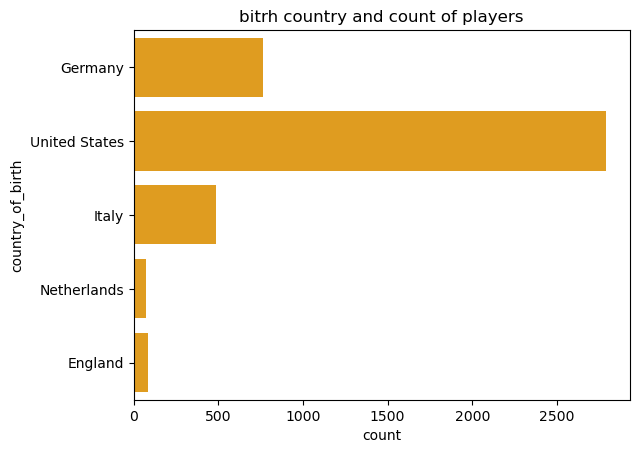

In [2231]:
sns.countplot(football["country_of_birth"], color = 'orange')
plt.title("bitrh country and count of players")
plt.show()

In [2261]:
# Most of the player are born in United States followed by Germany.

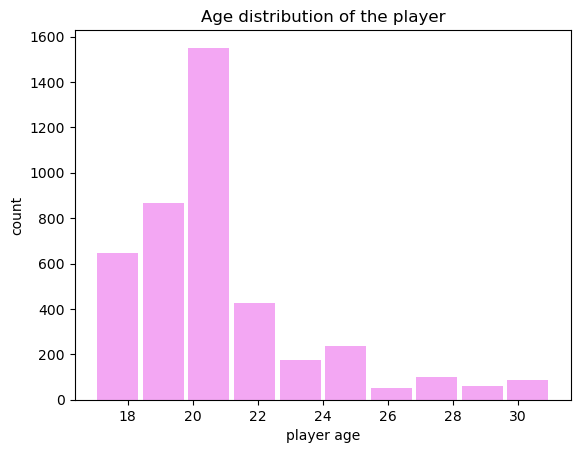

In [2259]:
plt.hist(football["age_of_player"], rwidth = 0.9, color = 'violet', alpha = 0.7)
plt.title("Age distribution of the player")
plt.xlabel("player age")
plt.ylabel("count")
plt.show()

In [2263]:
# Most player are from the age between 19 to 20.
# we can able to see right tail has been long so it is positive skew
# Many players are younger < 24 are higher when compared to the player > 25.

# K MEANS CLUSTERING

In [3755]:
football.columns

Index(['appearance_id', 'game_id', 'player_id', 'player_name',
       'competition_id', 'yellow_cards', 'red_cards', 'goals', 'assists',
       'minutes_played', 'season', 'round', 'home_club_goals',
       'away_club_goals', 'home_club_position', 'away_club_position',
       'home_club_manager_name', 'away_club_manager_name', 'stadium',
       'attendance', 'referee', 'home_club_name', 'away_club_name',
       'aggregate', 'competition_type', 'game_event_id', 'date', 'minute',
       'type_x', 'player_in_id', 'name', 'last_season', 'current_club_id',
       'player_code', 'country_of_birth', 'date_of_birth', 'sub_position',
       'position_x', 'foot', 'height_in_cm', 'market_value_in_eur',
       'highest_market_value_in_eur', 'contract_expiration_date',
       'game_lineups_id', 'type_y', 'number', 'team_captain', 'position_y',
       'position_x_encode', 'position_y_encode', 'foot_enc', 'day_of_week',
       'is_weekend', 'home_club_name_enc', 'away_club_name_enc',
       'competit

In [3852]:
feature_columns = football[["country_of_birth_enc", "height_in_cm"]]

In [3934]:
# scaling the feature columns

In [3858]:
scaled_df = scaling.fit_transform(feature_columns)
scaled_df = pd.DataFrame(scaled_df, columns = feature_columns.columns)

In [3860]:
X = scaled_df.copy()

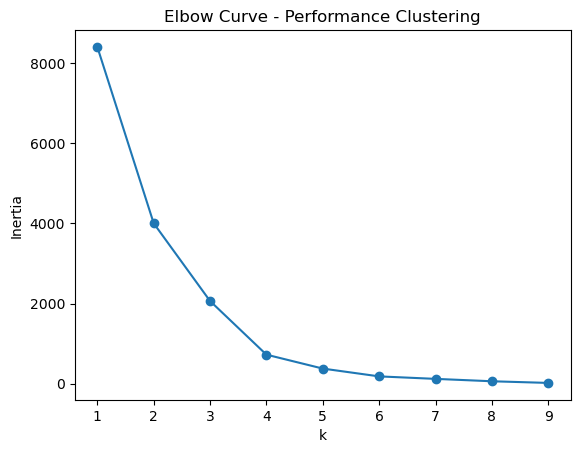

In [3862]:
# Elbow method
inertia = []
for k in range(1, 10):
    Kmeans = KMeans(n_clusters=k, random_state=1)
    Kmeans.fit(X)
    inertia.append(Kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Curve - Performance Clustering')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.6310428270785939
For n_clusters = 3 The average silhouette_score is : 0.6811783173897593
For n_clusters = 4 The average silhouette_score is : 0.7964444836706547
For n_clusters = 5 The average silhouette_score is : 0.8522721422188999
For n_clusters = 6 The average silhouette_score is : 0.8911979227909385
For n_clusters = 7 The average silhouette_score is : 0.911413540886653
For n_clusters = 8 The average silhouette_score is : 0.9286603228880723
For n_clusters = 9 The average silhouette_score is : 0.9110526605448992


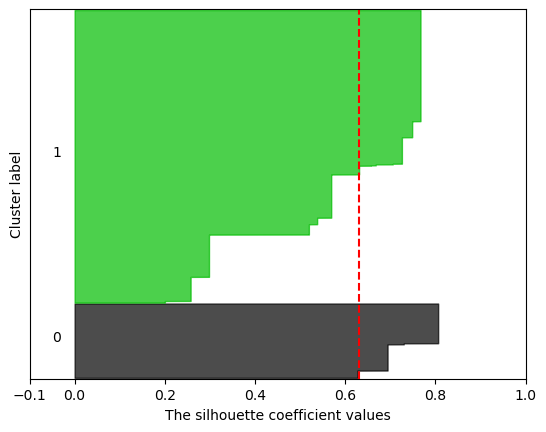

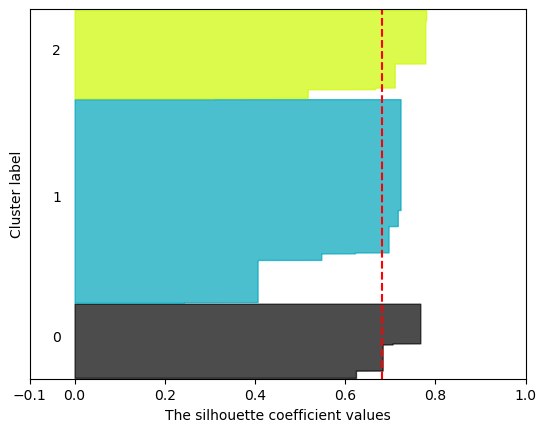

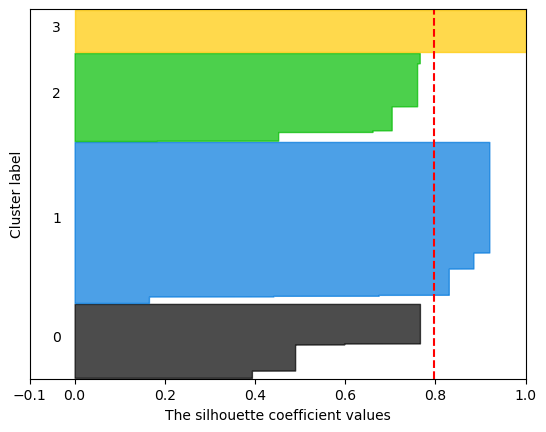

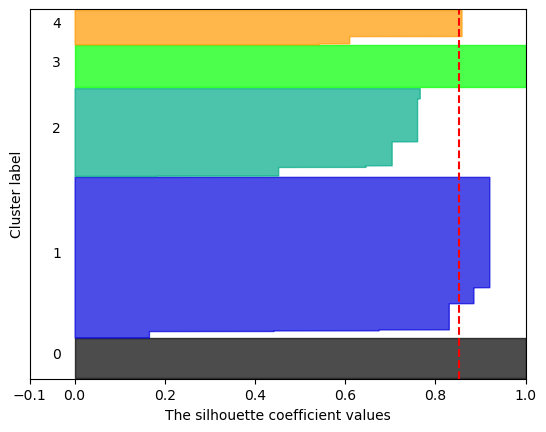

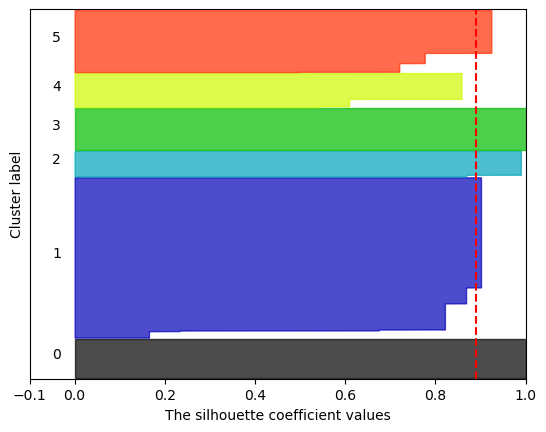

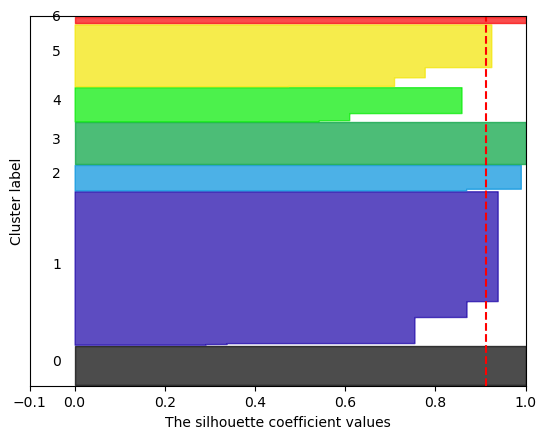

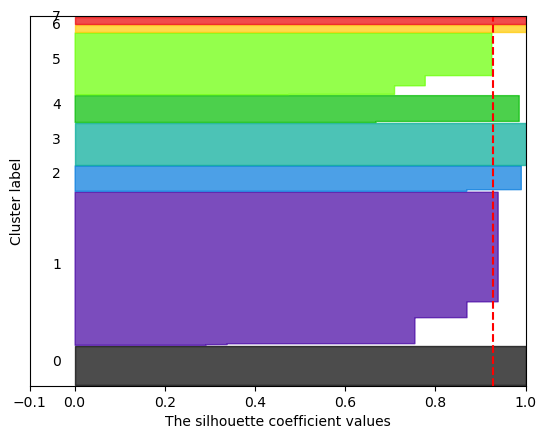

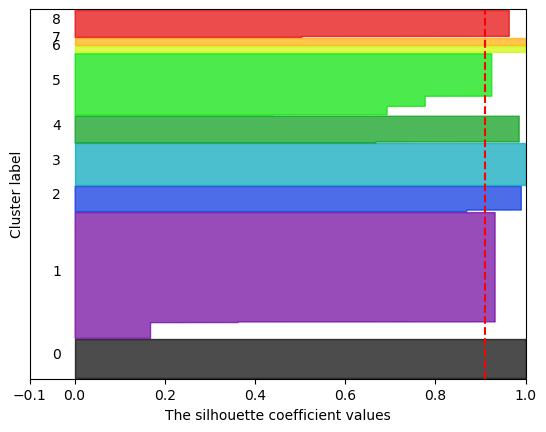

In [3864]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]
for n_clusters in range_n_clusters:
    fig, ax1 = plt.subplots(1, 1) # Create a subplot with 1 row and 1 columns
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10 ])
    # initializing and training the k means model
    clusterer = KMeans(n_clusters=n_clusters, random_state=2)   
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
    "The average silhouette_score is :", silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    # visualizing silhouette score for each cluster
    # initialize the starting y position for plotting the silhouette score for the first cluster.
    y_lower = 10
    for i in range(n_clusters): # loop iterates through cluster from 0 to n_cluster - 1
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i] #select the silhouette score for all data point belong to cluster i
        ith_cluster_silhouette_values.sort() # sort the silhouette score of current cluster in ascending order
        size_cluster_i = ith_cluster_silhouette_values.shape[0] # Get the number of datapoints in the current cluster
        y_upper = y_lower + size_cluster_i # calculate the upper position for plotting the silhouette score for current cluster
        color = cm.nipy_spectral(float(i) / n_clusters) # assign a unique color to the current clusters using the nipy_spectral color map.
                                                        # The color is determine by the index i related to number of cluster
        ax1.fill_betweenx(np.arange(y_lower, y_upper),0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        # create a filled area plot representing the silhouette score of the current cluster
        # np.arange(y_lower, y_upper) -- generate the array of y values for the data point in current cluster
        # 0 -- The starting x value for the filled area at the silhouette score of 0
        # ith_cluster_silhouette_values That defines the width of the filled area
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))  # add a text label indicating the cluster number on y axis
        y_lower = y_upper + 10 # updates the starting y position for the next color # adding some vertical spacing
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # Draws the vertical dashed red line at the average silhoueete score for the current 
                                                               # number of clusters. This helps to visualize the overall quality of clustering.
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.show()

In [3930]:
# k = 4 It is optimised value which is found using elbow and silhouette method.

In [3867]:
k = 4

In [3869]:
Kmeans = KMeans(n_clusters = k, random_state = 2)

In [3871]:
Kmeans.fit(X)

KMeans(n_clusters=4, random_state=2)

In [3873]:
# cluster centroids

In [3875]:
Kmeans.cluster_centers_

array([[-1.71716301,  1.30583443],
       [ 0.64589629, -0.85727357],
       [ 0.67718787,  0.75564954],
       [-0.86819901, -0.59568551]])

In [3877]:
cluster_centroid = Kmeans.cluster_centers_

In [3879]:
# labels

In [3881]:
labels = Kmeans.labels_
labels

array([0, 0, 0, ..., 1, 1, 1])

In [3883]:
# Evaluating the model.

In [3897]:
silhouettescore = silhouette_score(X, labels)

In [3885]:
calinski_harabasz = calinski_harabasz_score(X, labels)

In [3887]:
davies_bouldin = davies_bouldin_score(X, labels)

In [3903]:
print("The silhouette score is ", round(silhouettescore,3))
print("The calinski_harabasz score is ", round(calinski_harabasz,2))
print("The davies_bouldin score is ", round(davies_bouldin,2))

The silhouette score is  0.796
The calinski_harabasz score is  14790.92
The davies_bouldin score is  0.38
